# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:

# Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

# Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

# Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

# How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

# A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\yjjai\Downloads\ibm-hr-analytics-employee-attrition-performance (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
#Lets check the shape of dataset
data.shape

(1470, 35)

# Data is Duplicated ?

In [5]:
data.duplicated().sum()

0

In [6]:
#Lets check the data type of dataset
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Checking the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#Checking null values in dataset
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [11]:
data.shape

(1470, 31)

In [12]:
#Checking description of dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# Basic Analysis with Visualisation

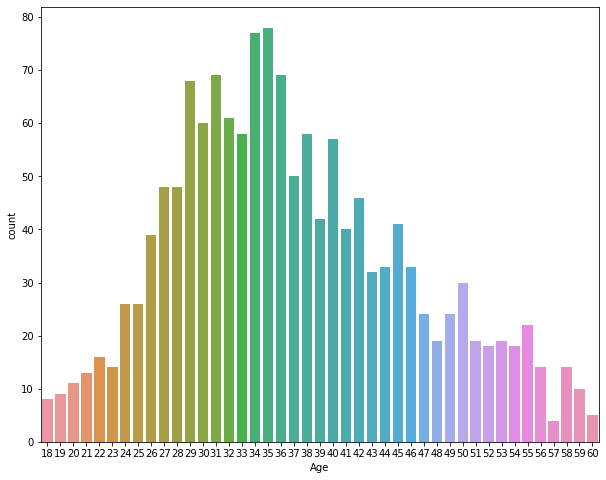

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [14]:
#Lets plot Age data .Using count plot
plt.figure(figsize=(10,8))
sns.countplot(x='Age',data=data)
plt.show()
data['Age'].value_counts()

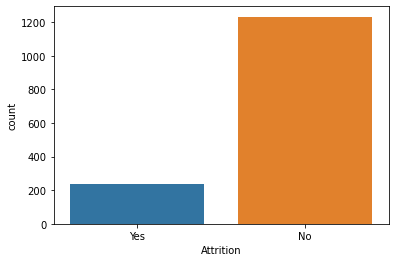

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
#Lets plot  data .Using count plot
sns.countplot(x='Attrition',data=data)
plt.show()
data['Attrition'].value_counts()

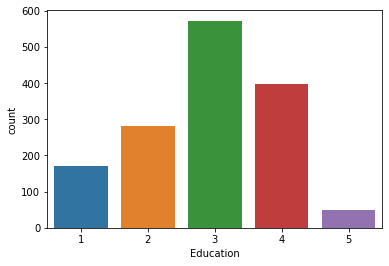

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [16]:
#Lets plot  data .Using count plot
sns.countplot(x='Education',data=data)
plt.show()
data['Education'].value_counts()

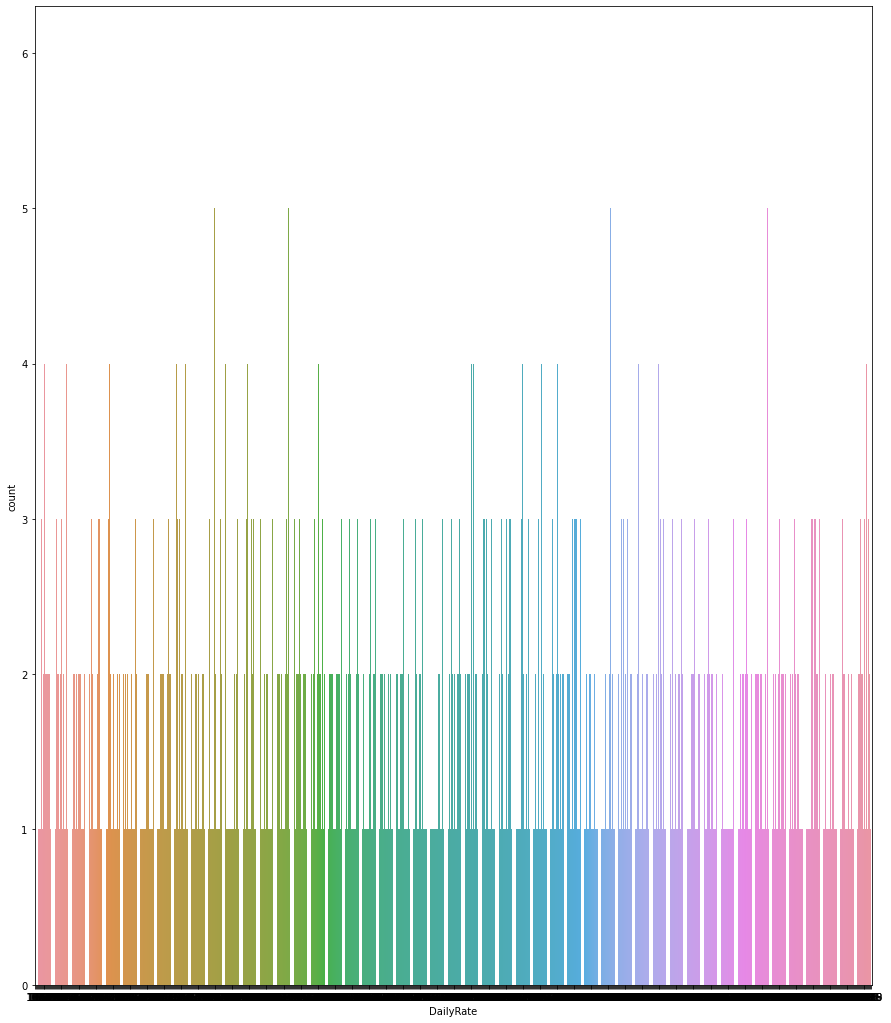

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

In [17]:
#Lets plot  data .Using count plot
plt.figure(figsize=(15,18))
sns.countplot(x='DailyRate',data=data)
plt.show()
data['DailyRate'].value_counts()

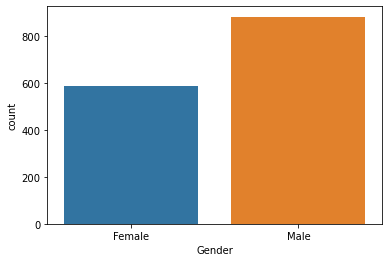

Male      882
Female    588
Name: Gender, dtype: int64

In [18]:
#Lets plot  data .Using count plot
sns.countplot(x='Gender',data=data)
plt.show()
data['Gender'].value_counts()

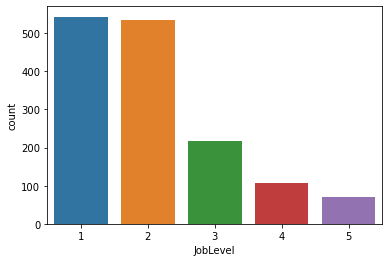

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [19]:
#Lets plot  data .Using count plot
sns.countplot(x='JobLevel',data=data)
plt.show()
data['JobLevel'].value_counts()

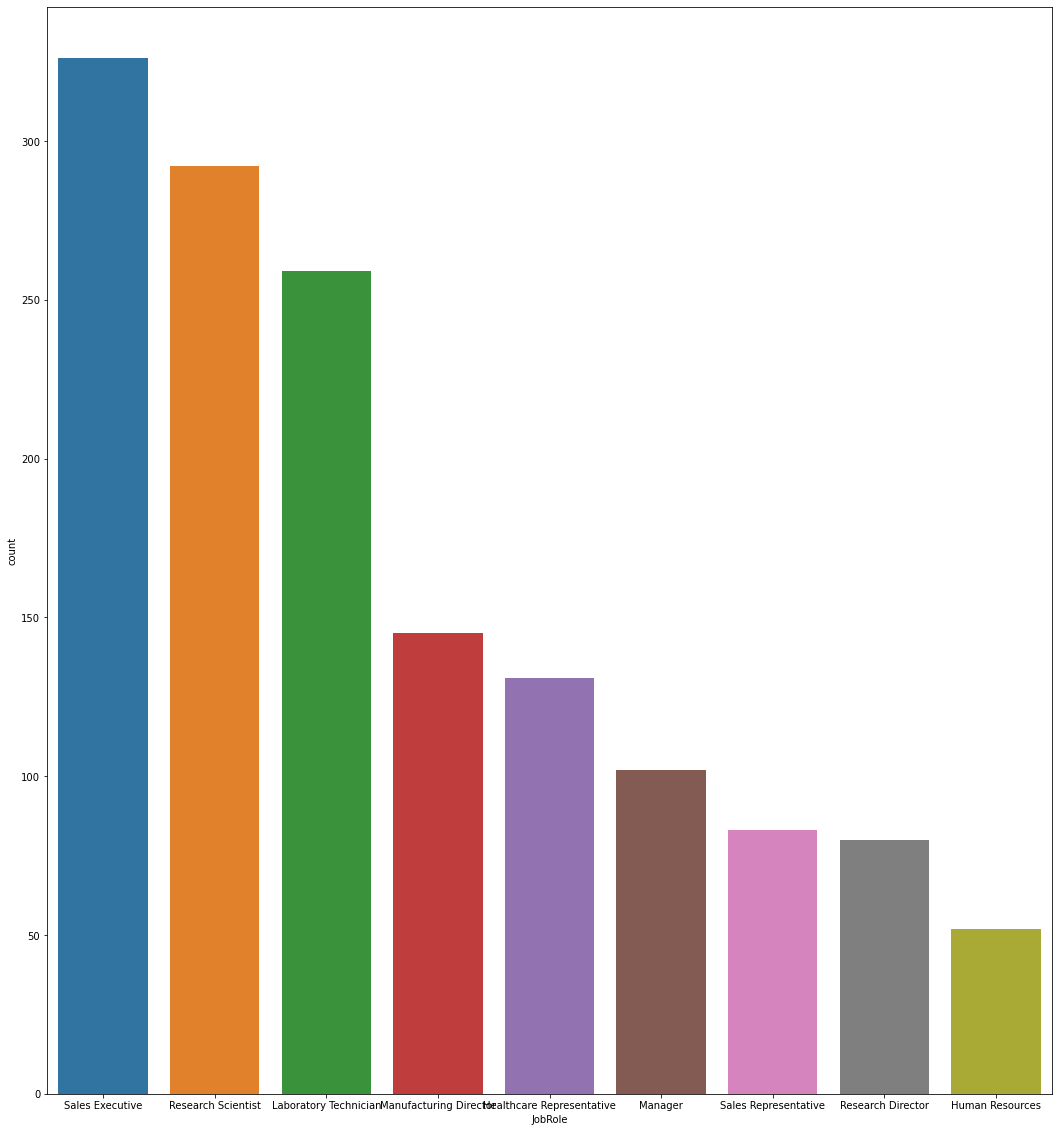

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [20]:
#Lets plot  data .Using count plot
plt.figure(figsize=(18,20))
sns.countplot(x='JobRole',data=data)
plt.show()
data['JobRole'].value_counts()

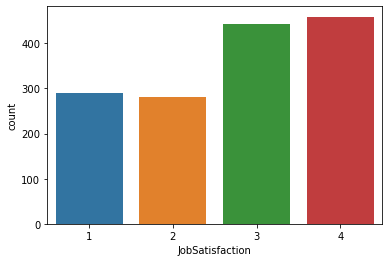

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [21]:
#Lets plot  data .Using count plot
sns.countplot(x='JobSatisfaction',data=data)
plt.show()
data['JobSatisfaction'].value_counts()

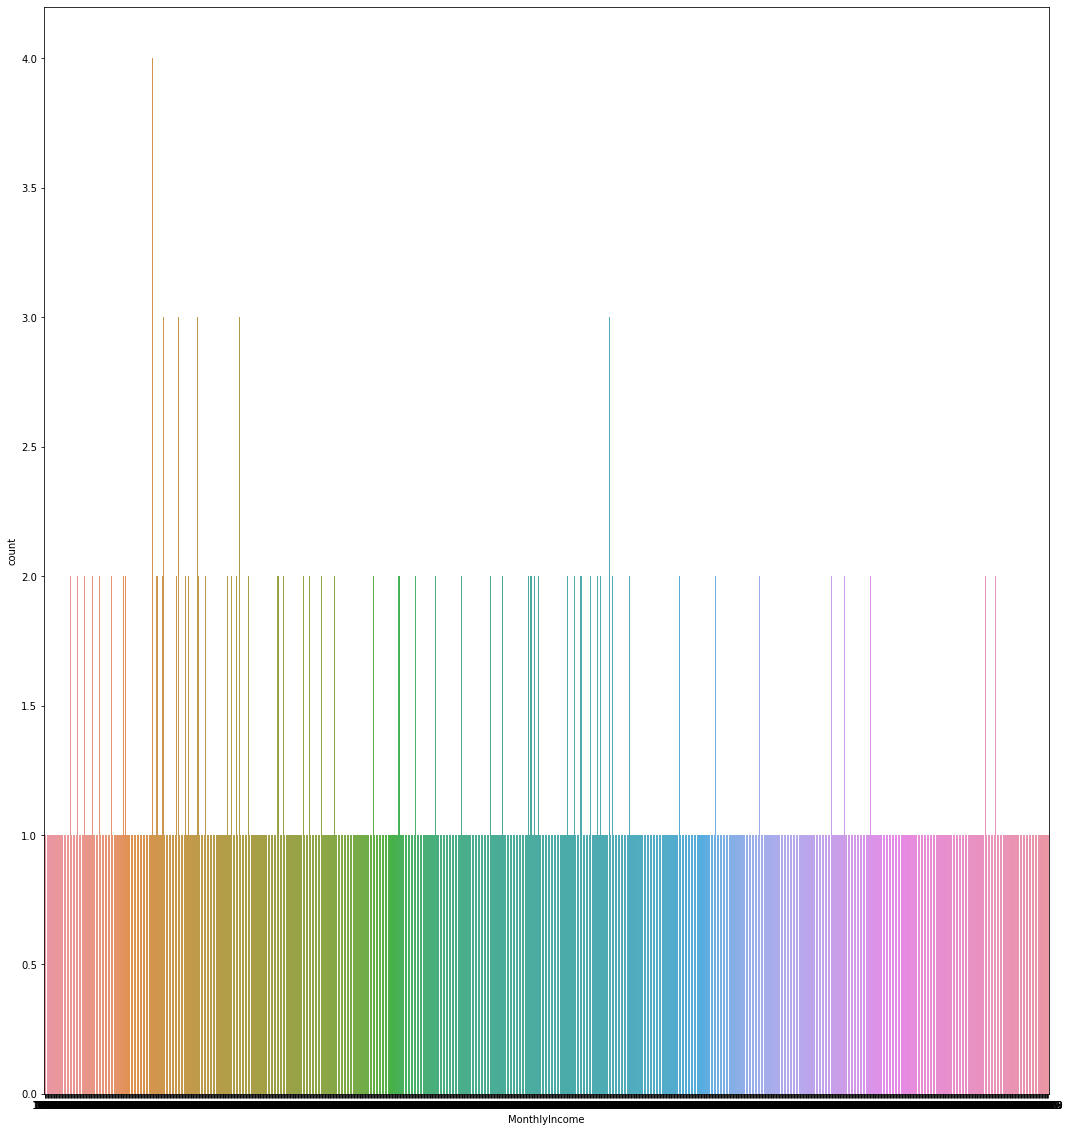

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [22]:
#Lets plot  data .Using count plot
plt.figure(figsize=(18,20))
sns.countplot(x='MonthlyIncome',data=data)
plt.show()
data['MonthlyIncome'].value_counts()

# Categorical column convert to Numerical Columns

# using LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lab_enc = LabelEncoder()

In [25]:
df1 = lab_enc.fit_transform(data['Attrition'])
pd.Series(df1)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Length: 1470, dtype: int32

In [26]:
data['Attrition']=df1
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [27]:
df2 = lab_enc.fit_transform(data['BusinessTravel'])
pd.Series(df2)

data['BusinessTravel']=df2
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [28]:
df3 = lab_enc.fit_transform(data['Department'])
pd.Series(df3)

data['Department']=df3
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [29]:
df4 = lab_enc.fit_transform(data['EducationField'])
pd.Series(df4)

data['EducationField']=df4
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [30]:
df5 = lab_enc.fit_transform(data['Gender'])
pd.Series(df5)

data['Gender']=df5
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [31]:
df6 = lab_enc.fit_transform(data['JobRole'])
pd.Series(df6)

data['JobRole']=df6
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [32]:
df7 = lab_enc.fit_transform(data['MaritalStatus'])
pd.Series(df7)

data['MaritalStatus']=df7
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [33]:
df8 = lab_enc.fit_transform(data['MaritalStatus'])
pd.Series(df8)

data['MaritalStatus']=df8
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# * EDA (Exploratory data analysis)

In [34]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


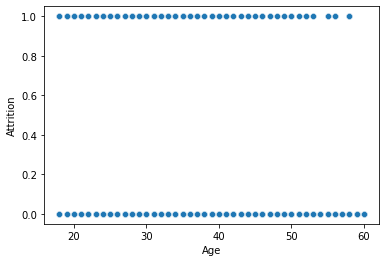

In [35]:
sns.scatterplot(x='Age',y='Attrition',data=data)
plt.show()

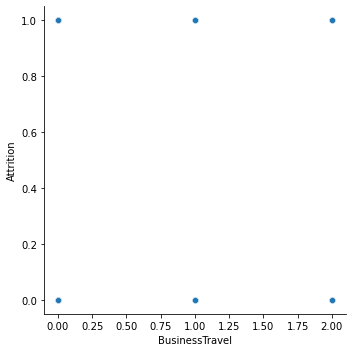

In [36]:
sns.relplot(x='BusinessTravel',y='Attrition',data=data,kind='scatter')
plt.show()

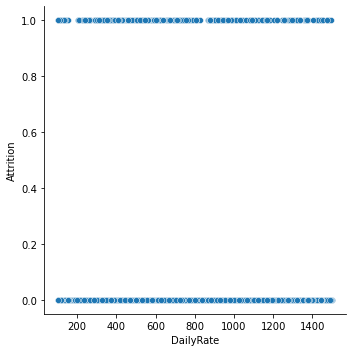

In [37]:
sns.relplot(x='DailyRate',y='Attrition',data=data,kind='scatter')
plt.show()

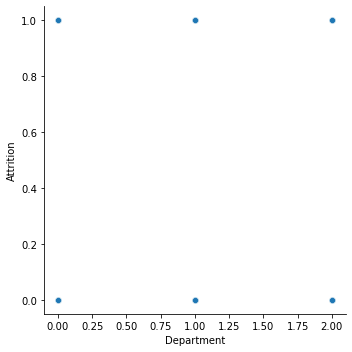

In [38]:
sns.relplot(x='Department',y='Attrition',data=data,kind='scatter')
plt.show()

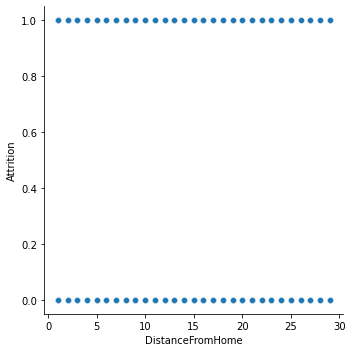

In [39]:
sns.relplot(x='DistanceFromHome',y='Attrition',data=data,kind='scatter')
plt.show()

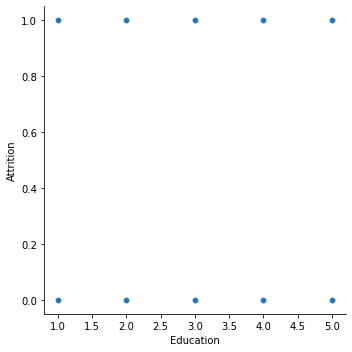

In [40]:
sns.relplot(x='Education',y='Attrition',data=data,kind='scatter')
plt.show()

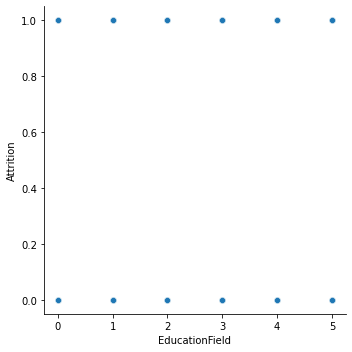

In [41]:
sns.relplot(x='EducationField',y='Attrition',data=data,kind='scatter')
plt.show()

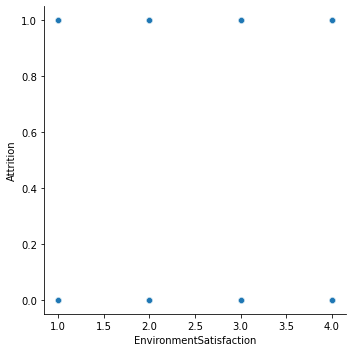

In [42]:
sns.relplot(x='EnvironmentSatisfaction',y='Attrition',data=data,kind='scatter')
plt.show()

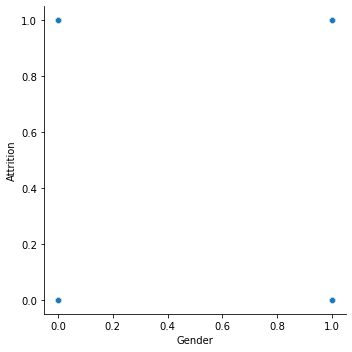

In [43]:
sns.relplot(x='Gender',y='Attrition',data=data,kind='scatter')
plt.show()

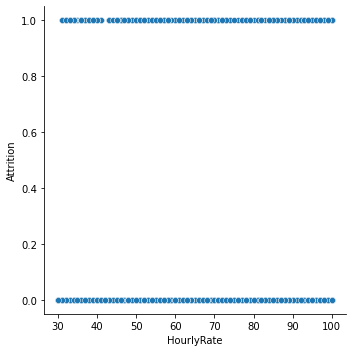

In [44]:
sns.relplot(x='HourlyRate',y='Attrition',data=data,kind='scatter')
plt.show()

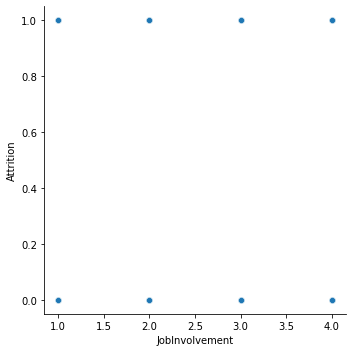

In [45]:
sns.relplot(x='JobInvolvement',y='Attrition',data=data,kind='scatter')
plt.show()

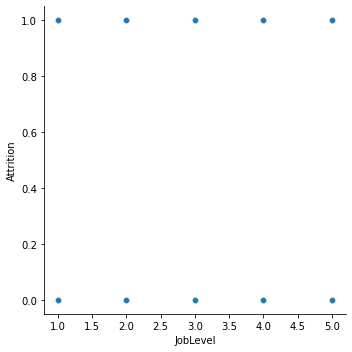

In [46]:
sns.relplot(x='JobLevel',y='Attrition',data=data,kind='scatter')
plt.show()

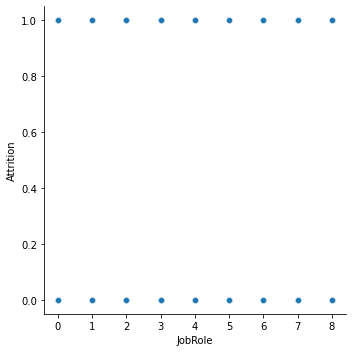

In [47]:
sns.relplot(x='JobRole',y='Attrition',data=data,kind='scatter')
plt.show()

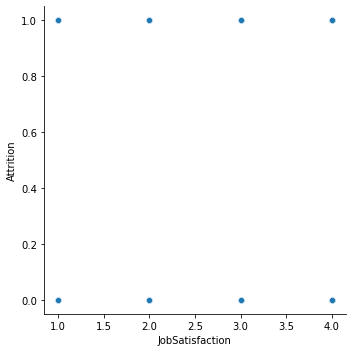

In [48]:
sns.relplot(x='JobSatisfaction',y='Attrition',data=data,kind='scatter')
plt.show()

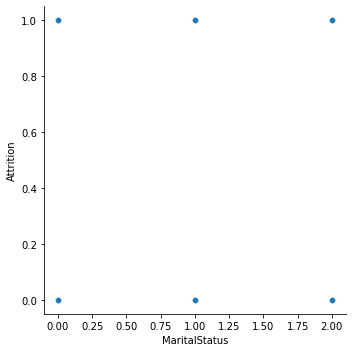

In [49]:
sns.relplot(x='MaritalStatus',y='Attrition',data=data,kind='scatter')
plt.show()

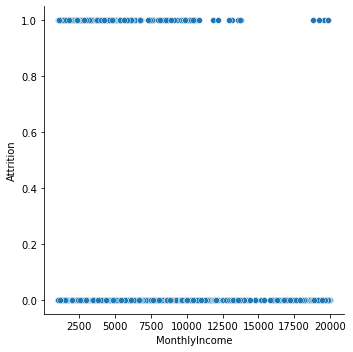

In [50]:
sns.relplot(x='MonthlyIncome',y='Attrition',data=data,kind='scatter')
plt.show()

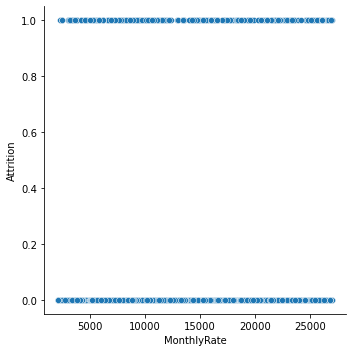

In [51]:
sns.relplot(x='MonthlyRate',y='Attrition',data=data,kind='scatter')
plt.show()

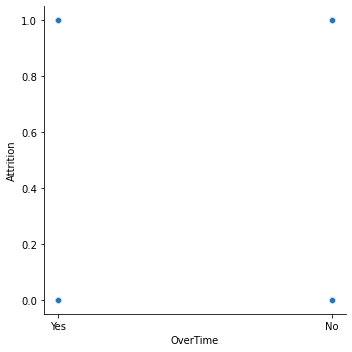

In [52]:
sns.relplot(x='OverTime',y='Attrition',data=data,kind='scatter')
plt.show()

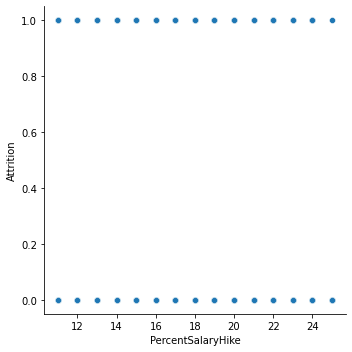

In [53]:
sns.relplot(x='PercentSalaryHike',y='Attrition',data=data,kind='scatter')
plt.show()

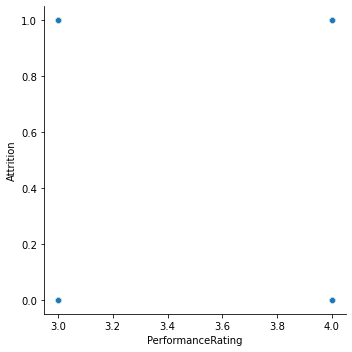

In [54]:
sns.relplot(x='PerformanceRating',y='Attrition',data=data,kind='scatter')
plt.show()

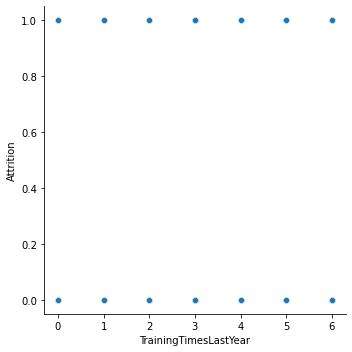

In [55]:
sns.relplot(x='TrainingTimesLastYear',y='Attrition',data=data,kind='scatter')
plt.show()

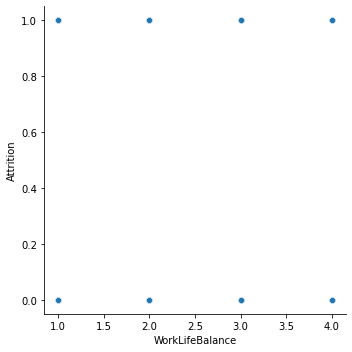

In [56]:
sns.relplot(x='WorkLifeBalance',y='Attrition',data=data,kind='scatter')
plt.show()

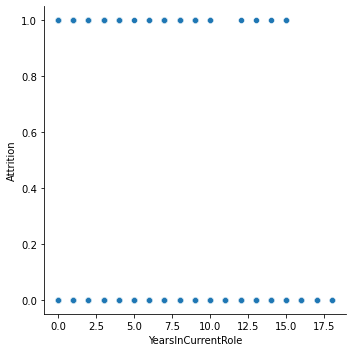

In [57]:
sns.relplot(x='YearsInCurrentRole',y='Attrition',data=data,kind='scatter')
plt.show()

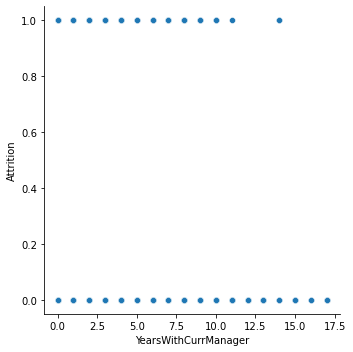

In [58]:
sns.relplot(x='YearsWithCurrManager',y='Attrition',data=data,kind='scatter')
plt.show()

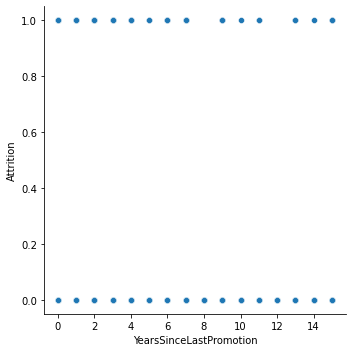

In [59]:
sns.relplot(x='YearsSinceLastPromotion',y='Attrition',data=data,kind='scatter')
plt.show()

In [60]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Figure size 2160x2160 with 0 Axes>

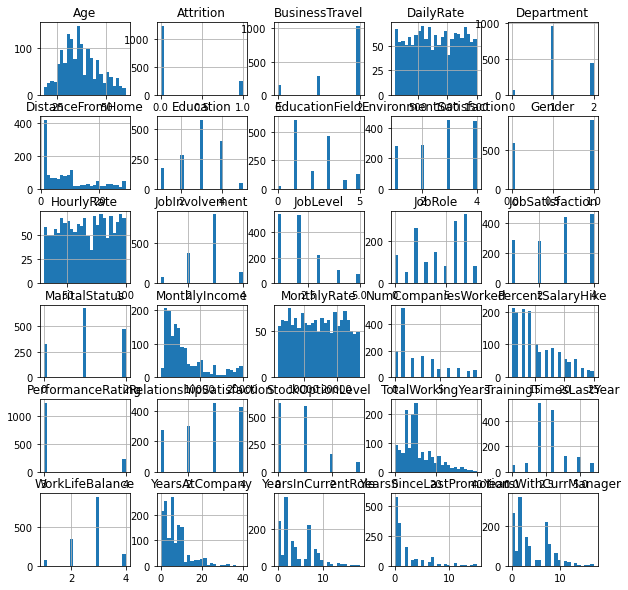

In [61]:
plt.figure(figsize=(30, 30))
data.hist(figsize=(10,10), bins=25)
plt.show()

# correlation

In [62]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

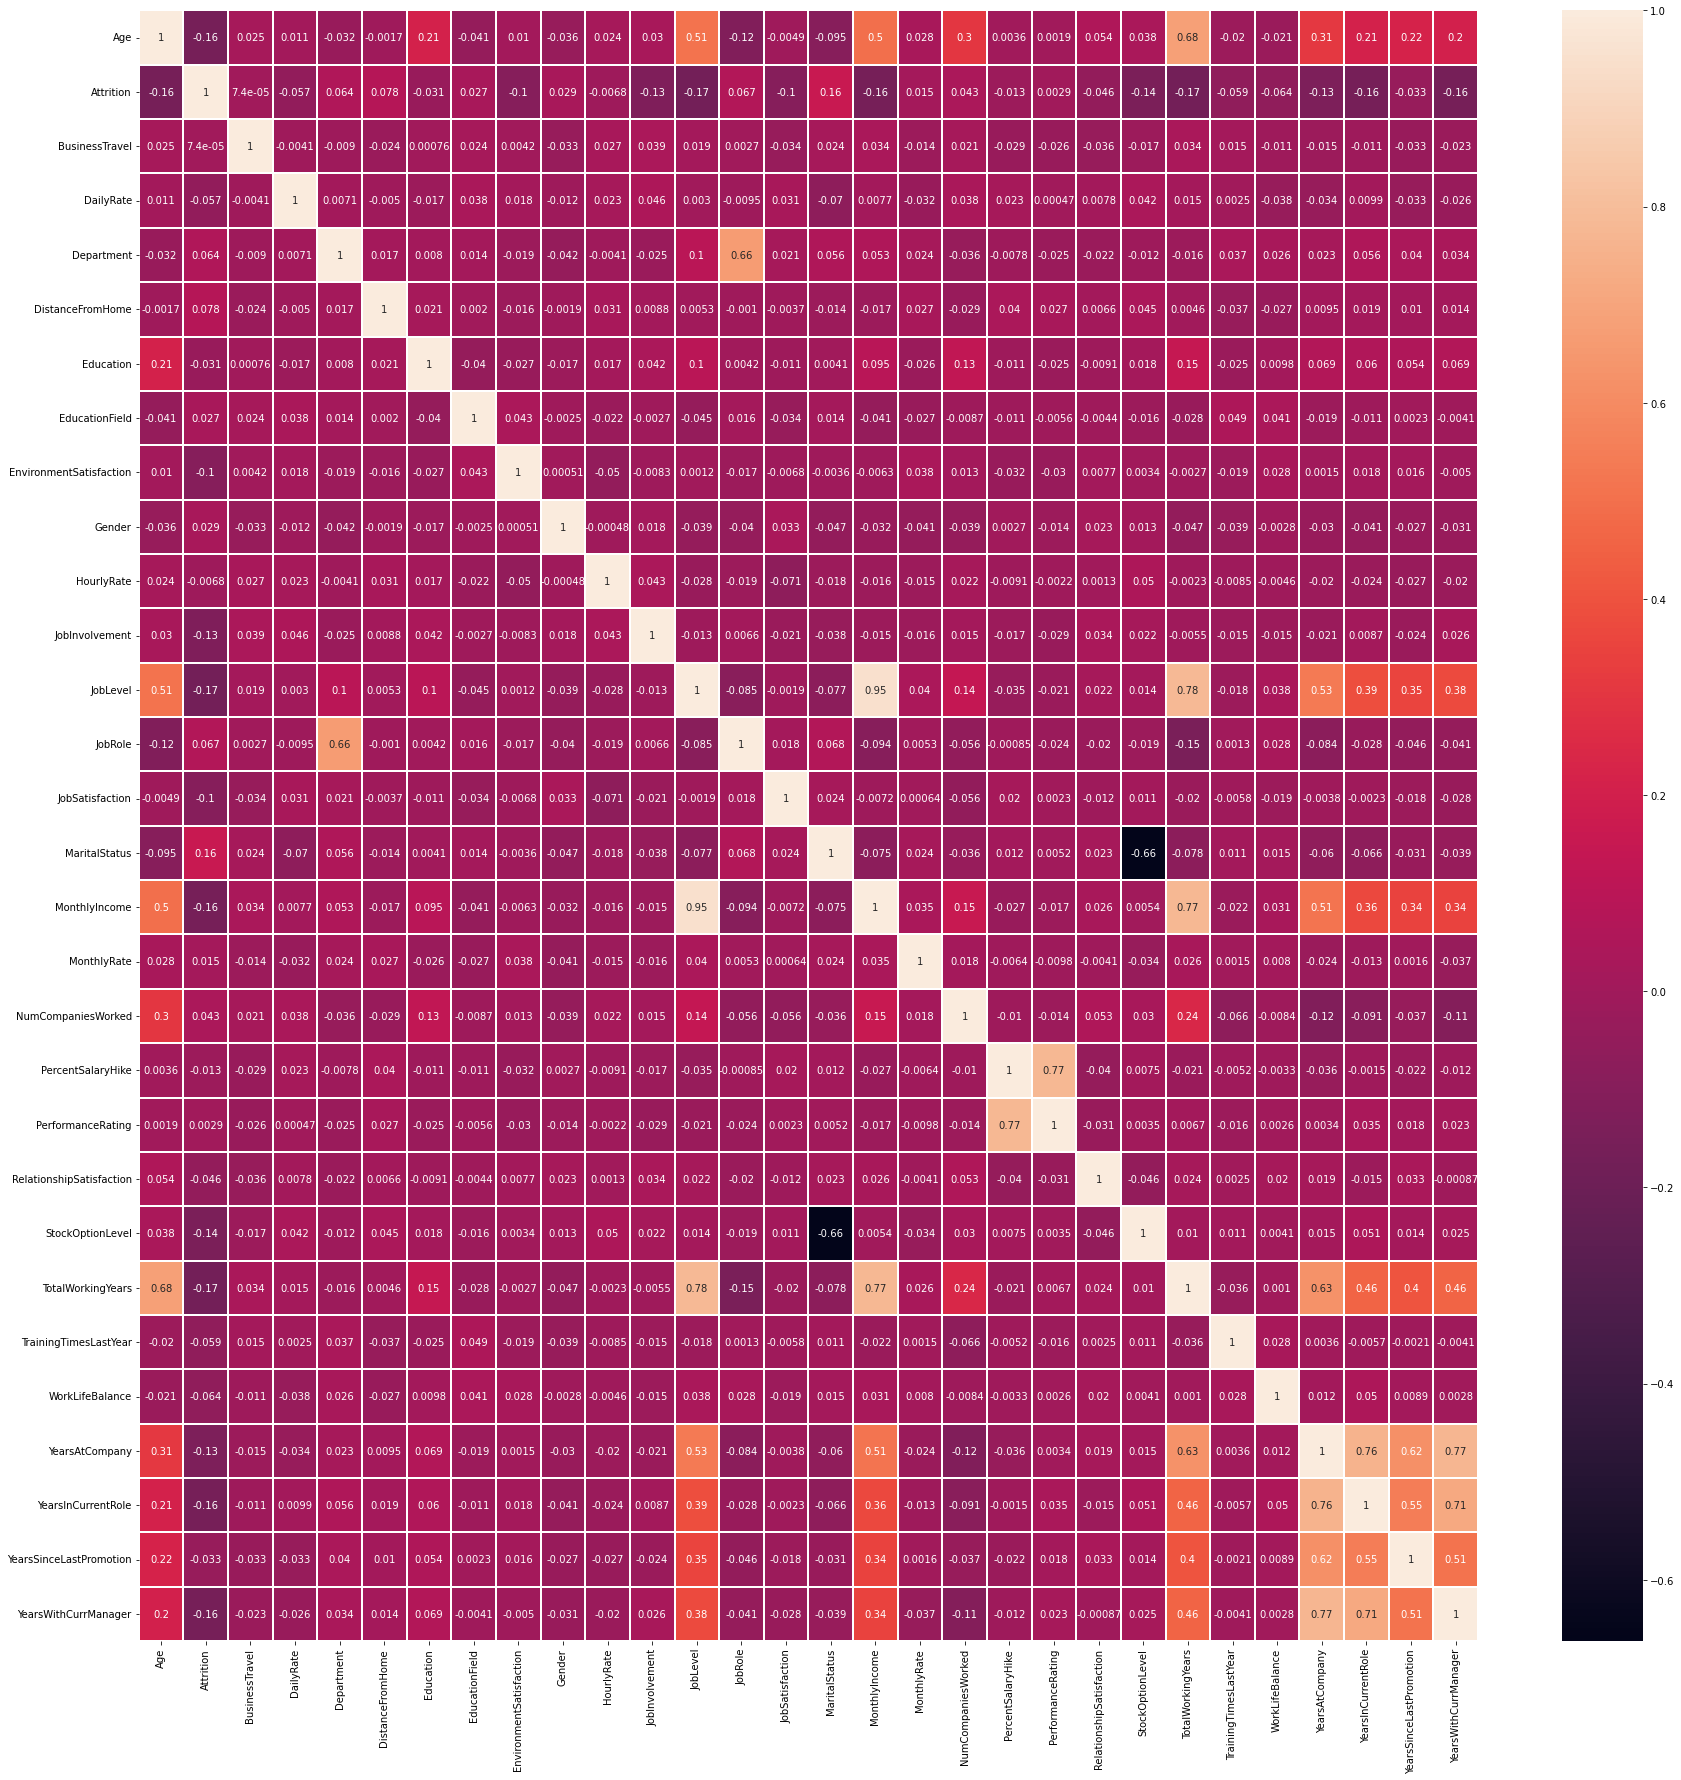

In [63]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, linecolor='white',linewidths=.25)

In [64]:
data.shape

(1470, 31)

In [65]:
data.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
DailyRate                    int64
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EnvironmentSatisfaction      int64
Gender                       int32
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int32
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [66]:
df9 = lab_enc.fit_transform(data['OverTime'])
pd.Series(df9)

data['OverTime']=df9
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


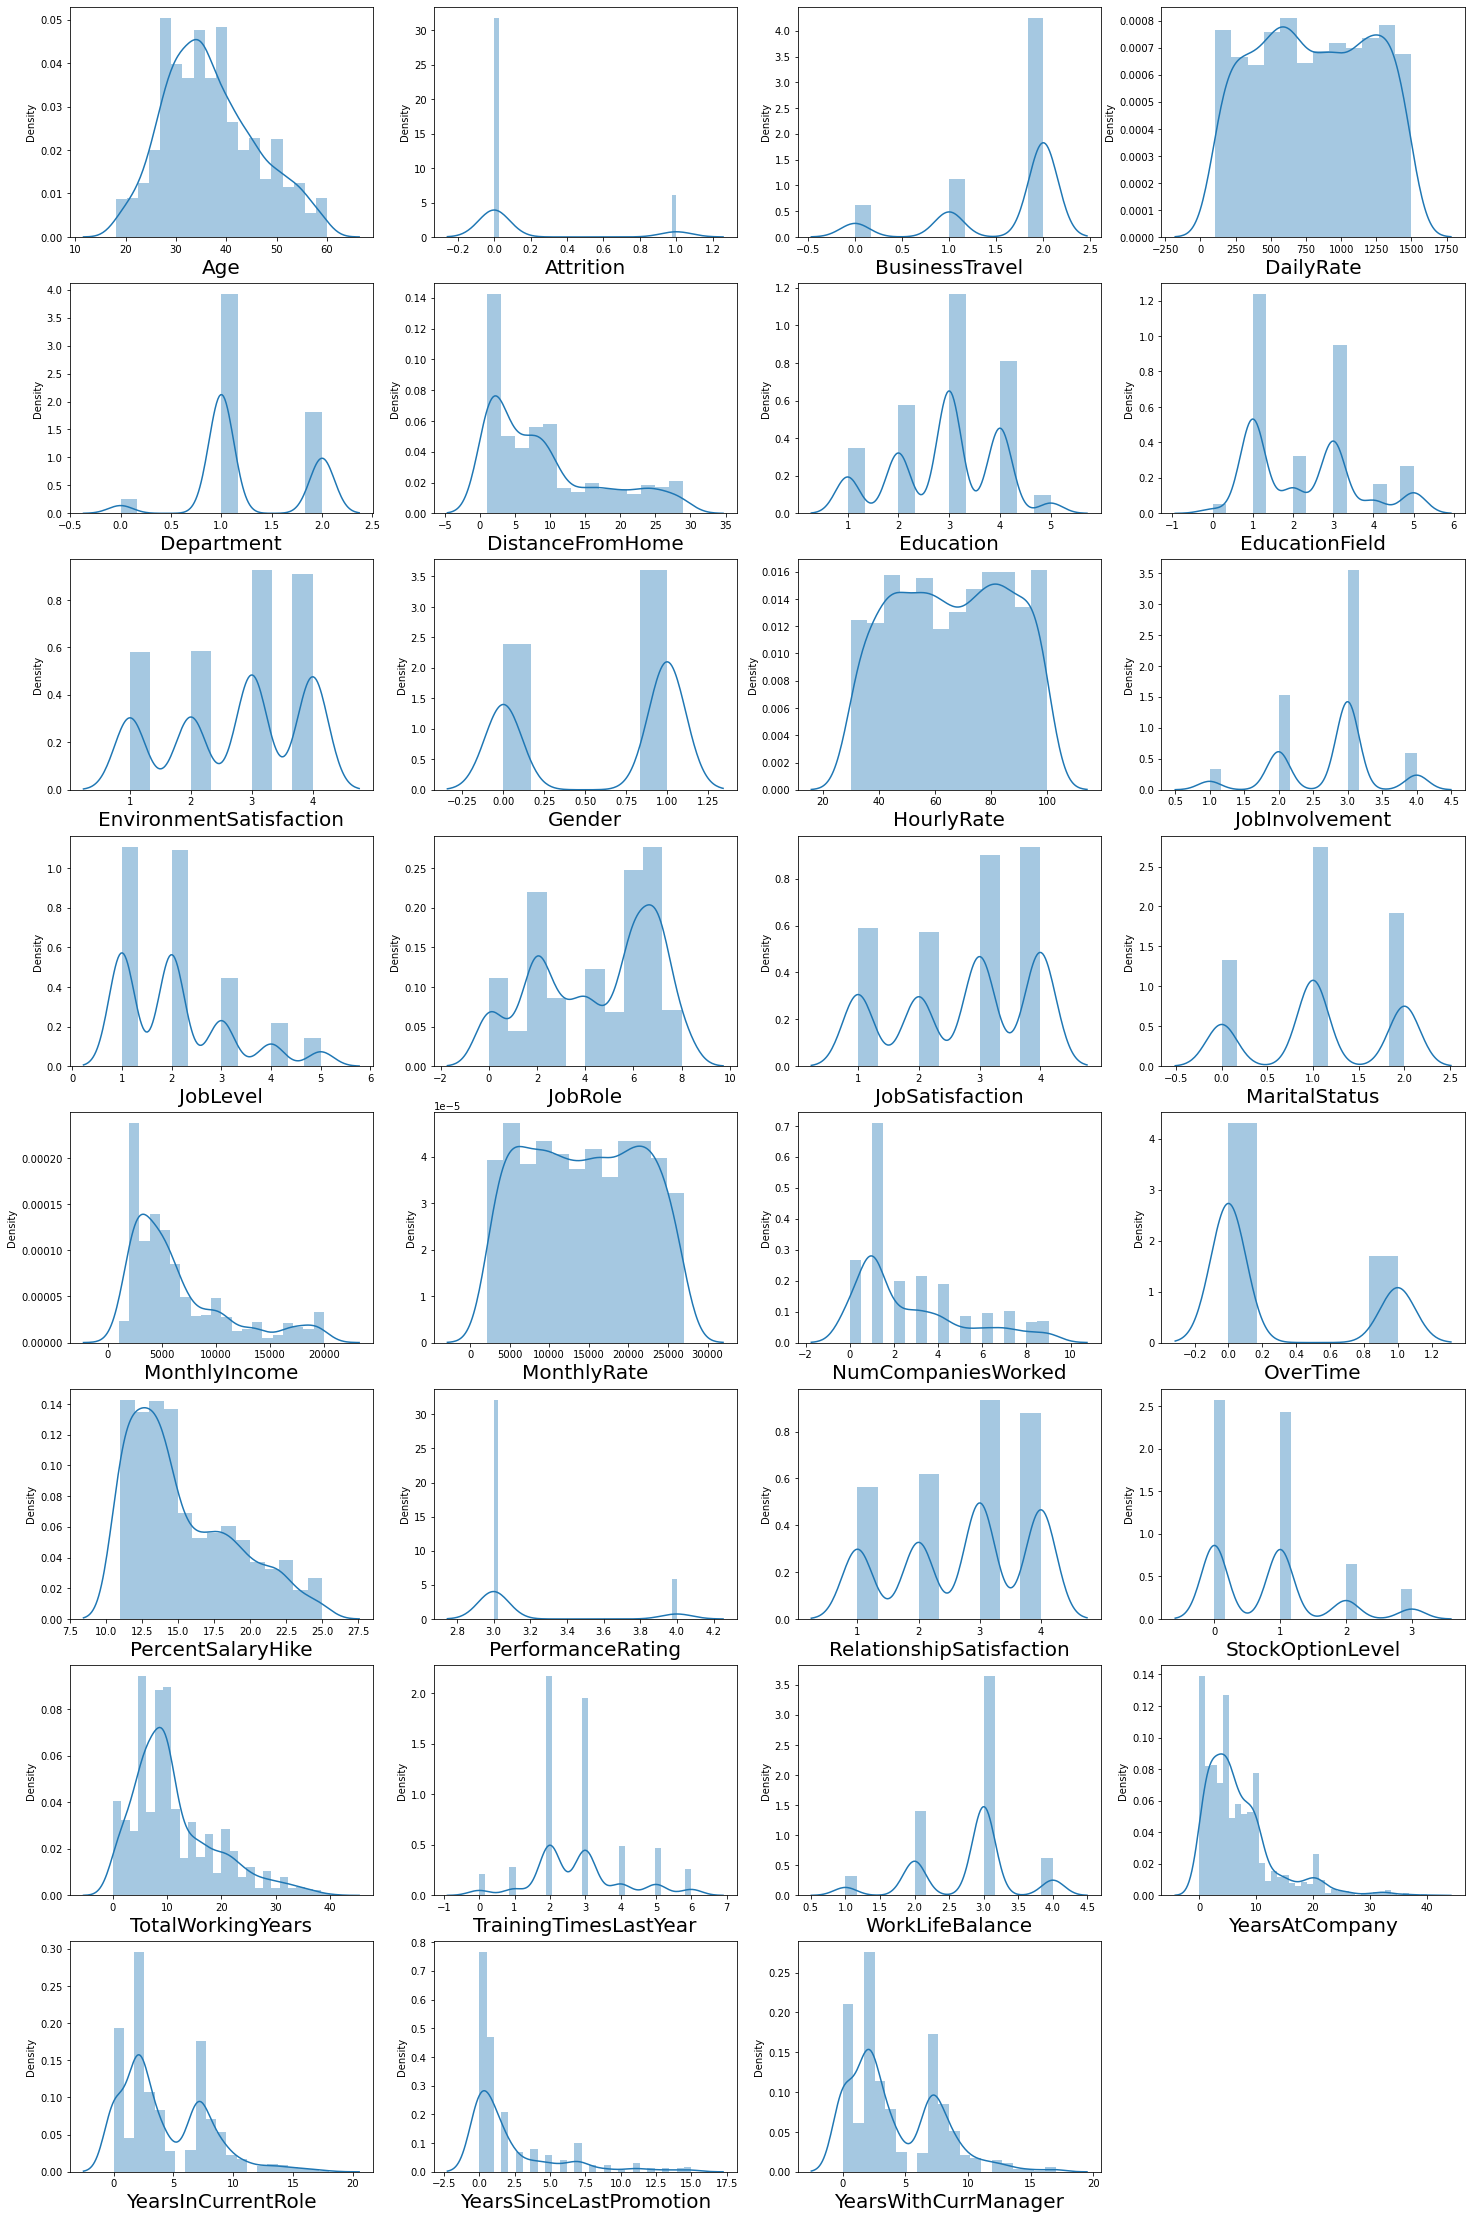

In [67]:
plt.figure(figsize=(25,50))
plotnumber=1

for column in data:
    if plotnumber<=31:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# * BOXPLOT

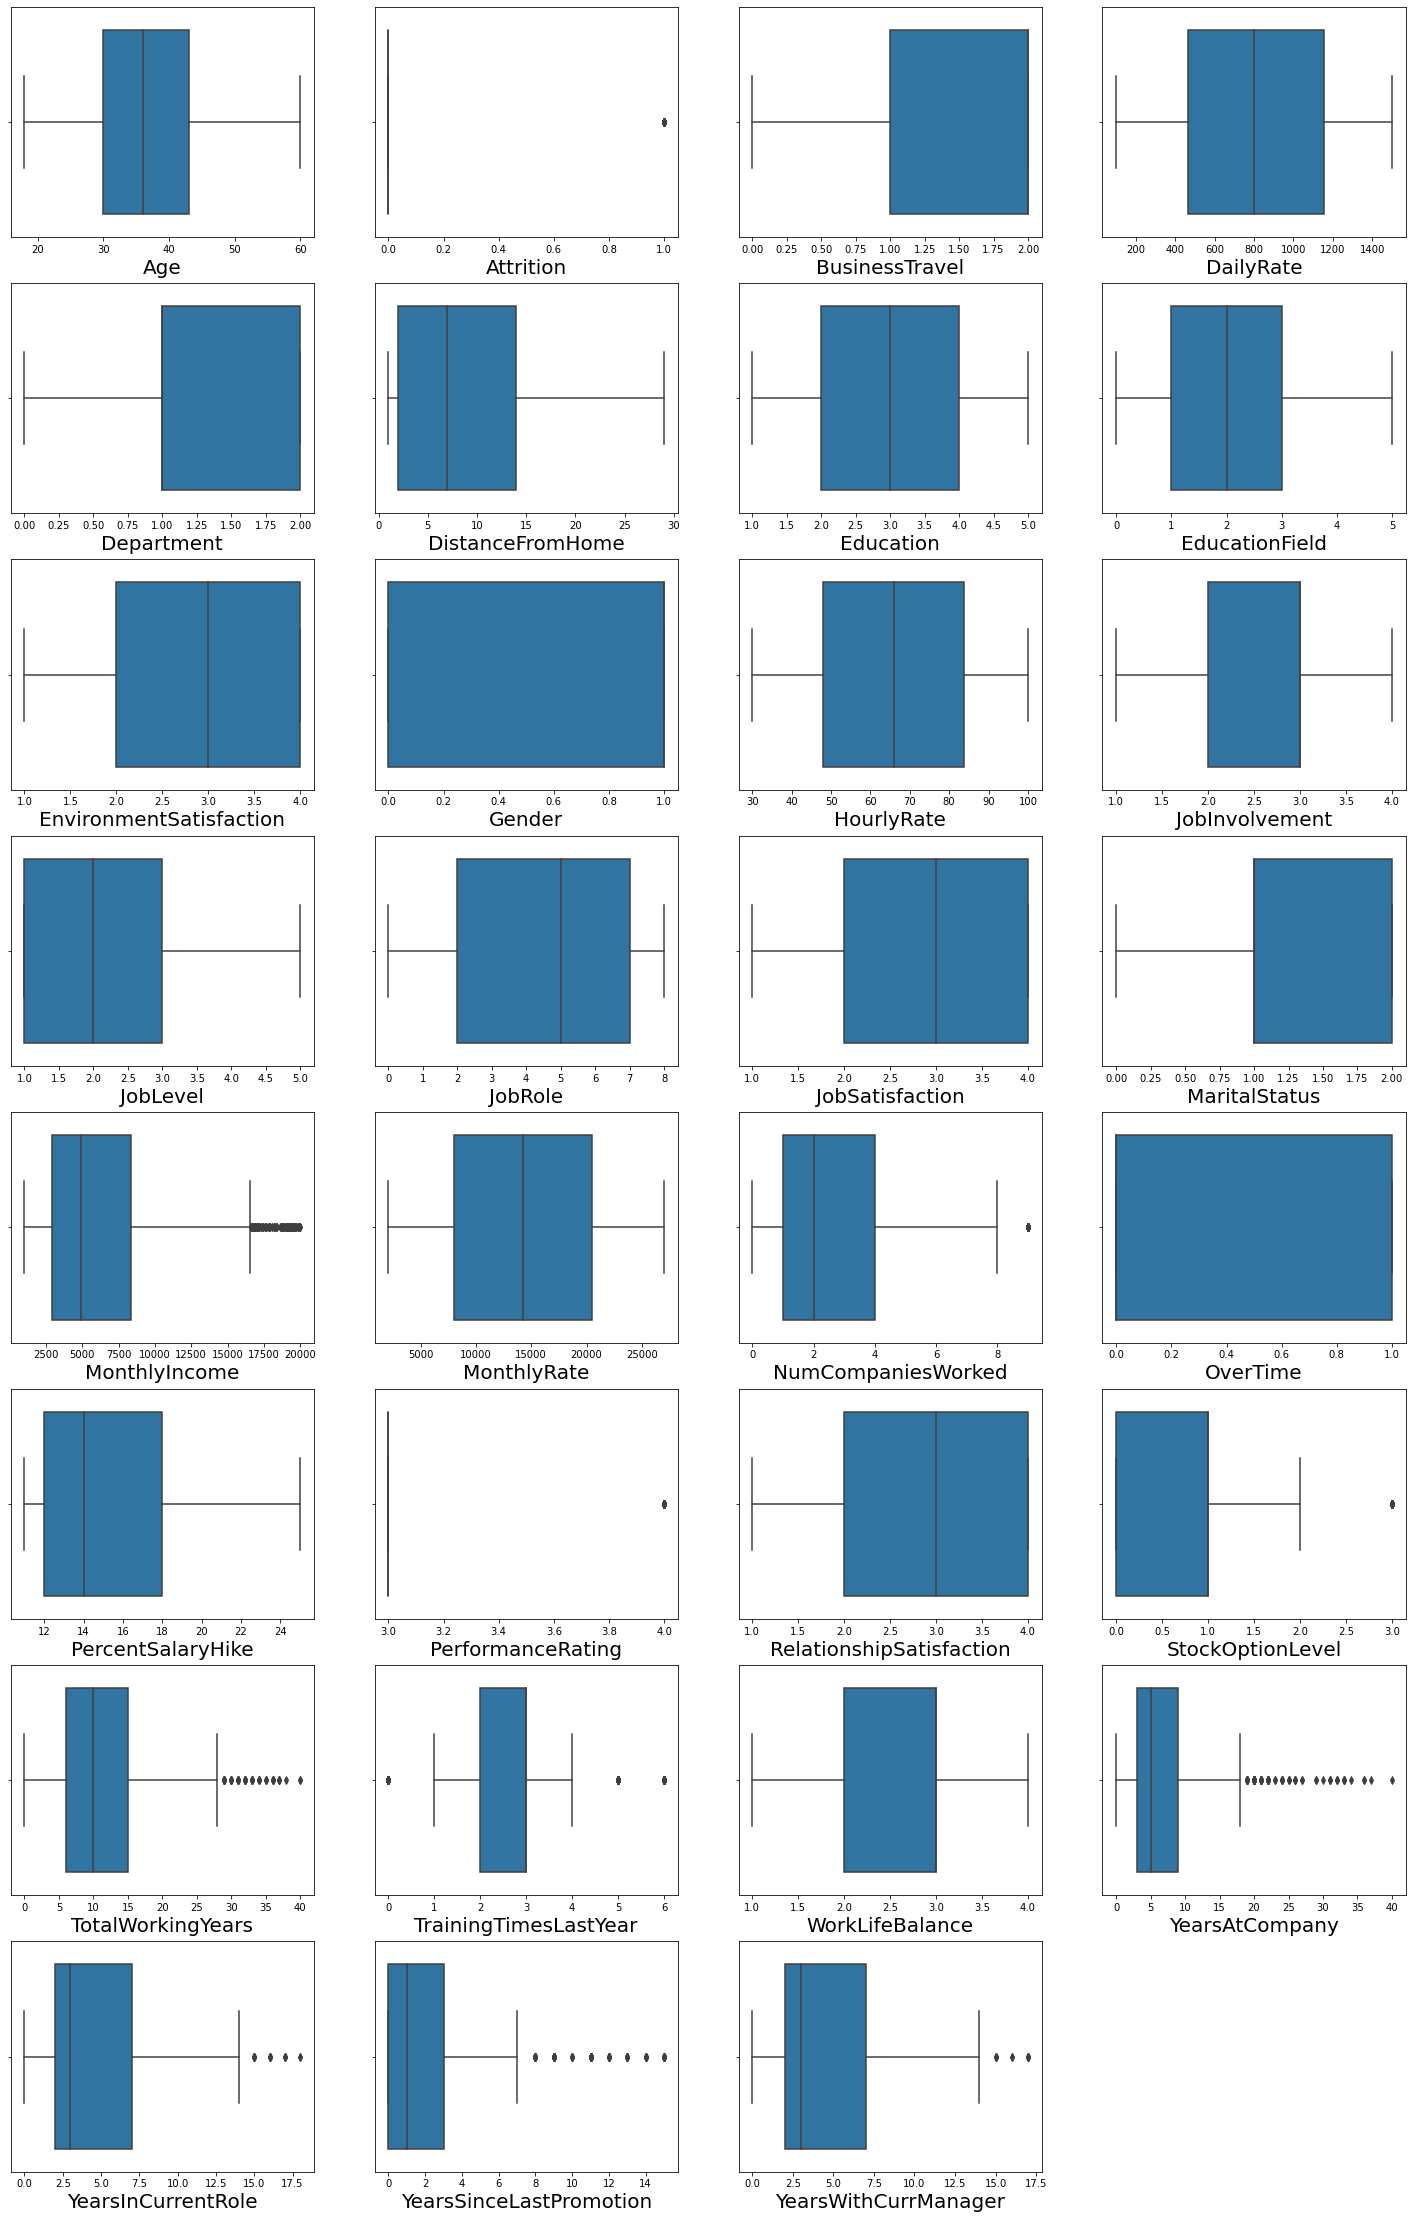

In [68]:
plt.figure(figsize=(25,50))
plotnumber=1
for column in data:
    if plotnumber <=31:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Removing Outliers:

# Zscore method:

In [69]:
from scipy.stats import zscore
z_score=zscore(data[['Attrition','MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
abs_z_score=np.abs(z_score)

In [70]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,36.258111,0.165105,1.604182,806.054074,1.260995,9.176640,2.896179,2.256669,2.725306,0.602019,...,3.152848,2.703677,0.795963,10.302091,2.803893,2.762797,6.104542,3.867340,1.775775,3.800288
std,8.838767,0.371409,0.667584,403.163183,0.526032,8.088602,1.023198,1.336205,1.090541,0.489658,...,0.359971,1.081529,0.856710,6.699832,1.291737,0.705043,4.679161,3.244441,2.499533,3.258874
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,467.500000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,2.000000,807.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,0.000000,2.000000,1160.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,13.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,34.000000,6.000000,4.000000,25.000000,15.000000,11.000000,14.000000


In [71]:
data.shape

(1387, 31)

# Checking for Skewness:

In [72]:
#Checking for Skewness
data.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

# Dividing data in feature and vectors

In [73]:
x=data.drop(columns='Attrition')#Feature
y=data.Attrition#Target

In [74]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.04090327,
        -0.71069889,  0.36826963],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  0.96589518,
        -0.31047991,  0.9821999 ],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.19241928,
        -0.71069889, -1.16655603],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.575758  ,
        -0.71069889, -0.24566063],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.65756454,
        -0.71069889,  1.28916503],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.26742737,
        -0.31047991, -0.55262577]])

# Now use VIF for checking multicollinearity problem
VIF - > Variance Inflation Factor

In [75]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [76]:
vif

,vif,feature
0,1.850568,Age
1,1.014106,BusinessTravel
2,1.029494,DailyRate
3,2.062034,Department
4,1.019457,DistanceFromHome
5,1.061558,Education
6,1.021559,EducationField
7,1.021370,EnvironmentSatisfaction
8,1.023993,Gender
9,1.022001,HourlyRate


# Lets Build the model

In [77]:
#Import train test split
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [79]:
from sklearn.metrics import accuracy_score,classification_report

In [80]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Radom State ",i,"The Model Performs Very Well")
        print("At random State ",i,"The Model performs very well")
        print("Training Accuracy Score is :- ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy Score is : - ",accuracy_score(y_test,pred_test)*100,"\n")

At Radom State  127 The Model Performs Very Well
At random State  127 The Model performs very well
Training Accuracy Score is :-  83.49864743011722
Testing Accuracy Score is : -  83.45323741007195 

At Radom State  168 The Model Performs Very Well
At random State  168 The Model performs very well
Training Accuracy Score is :-  84.2200180342651
Testing Accuracy Score is : -  84.17266187050359 

At Radom State  185 The Model Performs Very Well
At random State  185 The Model performs very well
Training Accuracy Score is :-  83.76916140667268
Testing Accuracy Score is : -  83.81294964028777 

At Radom State  334 The Model Performs Very Well
At random State  334 The Model performs very well
Training Accuracy Score is :-  83.76916140667268
Testing Accuracy Score is : -  83.81294964028777 

At Radom State  394 The Model Performs Very Well
At random State  394 The Model performs very well
Training Accuracy Score is :-  83.76916140667268
Testing Accuracy Score is : -  83.81294964028777 

At Rad

For Logistic Regression we select Random State - 683

# Lets check with KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [83]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8530207394048692
 At random state 0 , the testing accuracy is :- 0.8273381294964028


 At random state 1 , the testing accuracy is :- 0.8593327321911632
 At random state 1 , the testing accuracy is :- 0.7985611510791367


 At random state 2 , the testing accuracy is :- 0.8521190261496844
 At random state 2 , the testing accuracy is :- 0.8345323741007195


 At random state 3 , the testing accuracy is :- 0.8521190261496844
 At random state 3 , the testing accuracy is :- 0.8273381294964028


 At random state 4 , the testing accuracy is :- 0.8566275924256087
 At random state 4 , the testing accuracy is :- 0.8057553956834532


 At random state 5 , the testing accuracy is :- 0.8638412984670875
 At random state 5 , the testing accuracy is :- 0.8093525179856115


 At random state 6 , the testing accuracy is :- 0.848512173128945
 At random state 6 , the testing accuracy is :- 0.8345323741007195


 At random state 7 , the testing accuracy is :- 0

For KNeighbors Classifier we select Random State - 8

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [85]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
knn.score(x_train,y_train)#Training Score

0.8440036068530208

In [87]:
knn.score(x_test,y_test)#Testing Score

0.841726618705036

# Lets Build Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [91]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.8741007194244604


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.8381294964028777


 At random state 2 , the testing accuracy is :- 0.9981965734896303
 At random state 2 , the testing accuracy is :- 0.8669064748201439


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.8741007194244604


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.8597122302158273


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.8381294964028777


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.8920863309352518


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.8489208633093526


 At random state 

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

In [93]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
rf.score(x_train,y_train)

1.0

In [95]:
rf.score(x_test,y_test)

0.8920863309352518

# Adaboost

In [101]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [102]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    ada.fit(x_train,y_train)
    x_pred=ada.predict(x_train)
    y_pred=ada.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8954012623985572
 At random state 0 , the testing accuracy is :- 0.8741007194244604


 At random state 1 , the testing accuracy is :- 0.9071235347159603
 At random state 1 , the testing accuracy is :- 0.8453237410071942


 At random state 2 , the testing accuracy is :- 0.8990081154192967
 At random state 2 , the testing accuracy is :- 0.8812949640287769


 At random state 3 , the testing accuracy is :- 0.8972046889089269
 At random state 3 , the testing accuracy is :- 0.8561151079136691


 At random state 4 , the testing accuracy is :- 0.9026149684400361
 At random state 4 , the testing accuracy is :- 0.8561151079136691


 At random state 5 , the testing accuracy is :- 0.8954012623985572
 At random state 5 , the testing accuracy is :- 0.8453237410071942


 At random state 6 , the testing accuracy is :- 0.9026149684400361
 At random state 6 , the testing accuracy is :- 0.8992805755395683


 At random state 7 , the testing accuracy is :- 

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [104]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [105]:
ada.score(x_train,y_train)

0.8972046889089269

In [106]:
ada.score(x_test,y_test)

0.8920863309352518

# Do Hyperparameter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
grid_param={
    'n_estimators':[10,20,30,40,50],
    'learning_rate':[0.25,0.30,0.40]}

In [109]:
grid_search=GridSearchCV(estimator=ada,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [110]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.3, 0.4],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [111]:
cnn=AdaBoostClassifier(n_estimators=30,learning_rate=0.3)

In [112]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'learning_rate': 0.4, 'n_estimators': 40}


In [113]:
#Train the model
cnn.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=30)

In [114]:
cnn.score(x_train,y_train)

0.8584310189359784

In [115]:
cnn.score(x_test,y_test)

0.8884892086330936

# Lets Save Our Model

In [116]:
import pickle
filename='HRanalytics.'
pickle.dump(ada,open(filename,'wb'))

# Conclusion

In [117]:
loaded_model=pickle.load(open('HRanalytics','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

89.20863309352518


In [118]:
# batch  No - ds0522
# Data Trained